# Домашее задание 2

- Загрузите изображение и переведите его в цветовое пространство HSV

- Настройте цветовой фильтр на баскетбольное кольцо так, чтобы маска была зашумлена. Пусть в ней будут отдельные белые пиксели и даже целые области, не соответствующие кольцу. Удалите этот шум с помощью морфологических операций, выводя все промежуточные этапы на экран

- Удалите шум с помощью фильтрации связных компонент, пользуясь указаниями в первом ответе по ссылке https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python

После выполнения закоммитьте задание в ветку *cv_hw* в своем репозитории.

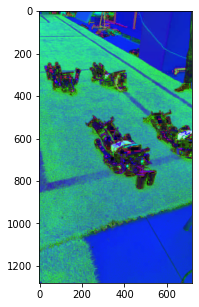

In [223]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

ax=6
ay=5
canvas = cv2.imread('/content/sahrs_on_the_field.jpg')
 #Преобразуем в HSV
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(ax, ay))
plt.imshow(img)
plt.show()


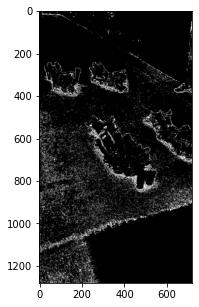

In [224]:

mask = cv2.inRange(img, (20, 100, 10), (100, 200, 120))

plt.figure(figsize=(ax, ay))
plt.imshow(mask, cmap="gray")
plt.show()

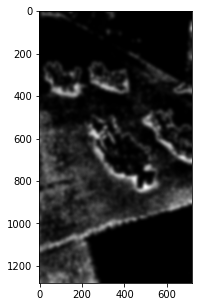

In [225]:
blur = cv2.GaussianBlur(mask, (45,45), 0)
plt.figure(figsize=(ax, ay))
plt.imshow(blur, cmap="gray")
plt.show()


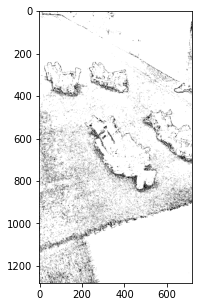

In [226]:
thresh = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
plt.figure(figsize=(ax, ay))
plt.imshow(thresh, cmap="gray")

359
639


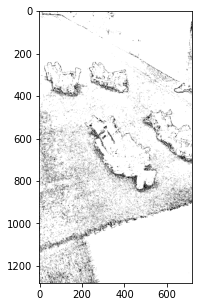

In [229]:
mainContour = max(contours, key = cv2.contourArea)
M = cv2.moments(mainContour)
if M['m00'] != 0:
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(cx)
    print(cy)

plt.figure(figsize=(ax, ay))
plt.imshow(thresh, cmap="gray")

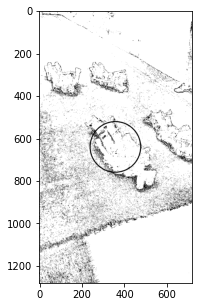

In [230]:
center = (cx, cy)
radius = int(cx/3)
ft=cv2.circle(thresh, center, radius, (0, 255, 0),3)
plt.figure(figsize=(ax, ay))
plt.imshow(ft, cmap="gray")